In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# read data
file_path = 'processed_data.csv'
data = pd.read_csv(file_path)

# check the head
print(data.head())

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('processed_data.csv')

# 选择数字类型的列
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# 用于存储每列的统计信息
stats_summary = pd.DataFrame(columns=['Column', 'Min', 'Max', 'Mean', 'Median'])

# 对每个数字列绘制点图并计算统计数据
for column in numeric_columns:
    plt.figure(figsize=(10, 4))
    plt.scatter(data.index, data[column], alpha=0.5)
    plt.title(f'Scatter plot for {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()
    
    # 计算统计数据
    min_val = data[column].min()
    max_val = data[column].max()
    mean_val = data[column].mean()
    median_val = data[column].median()
    
    # 构建一个新的DataFrame以添加新的统计数据
    new_data = pd.DataFrame({
        'Column': [column],
        'Min': [min_val],
        'Max': [max_val],
        'Mean': [mean_val],
        'Median': [median_val]
    })
    
    # 使用 pd.concat() 添加到 stats_summary DataFrame
    stats_summary = pd.concat([stats_summary, new_data], ignore_index=True)

# 输出统计汇总
print(stats_summary)


In [7]:
# 计算 'progress' 和 'contract_status' 列中每个数字的占比
progress_counts = data['progress'].value_counts(normalize=True)
contract_status_counts = data['contract_status'].value_counts(normalize=True)

progress_counts, contract_status_counts


(progress
  0    0.807007
  1    0.147503
 -1    0.045490
 Name: proportion, dtype: float64,
 contract_status
 0    0.879404
 1    0.120596
 Name: proportion, dtype: float64)

<h1>data analysis for model</h1>


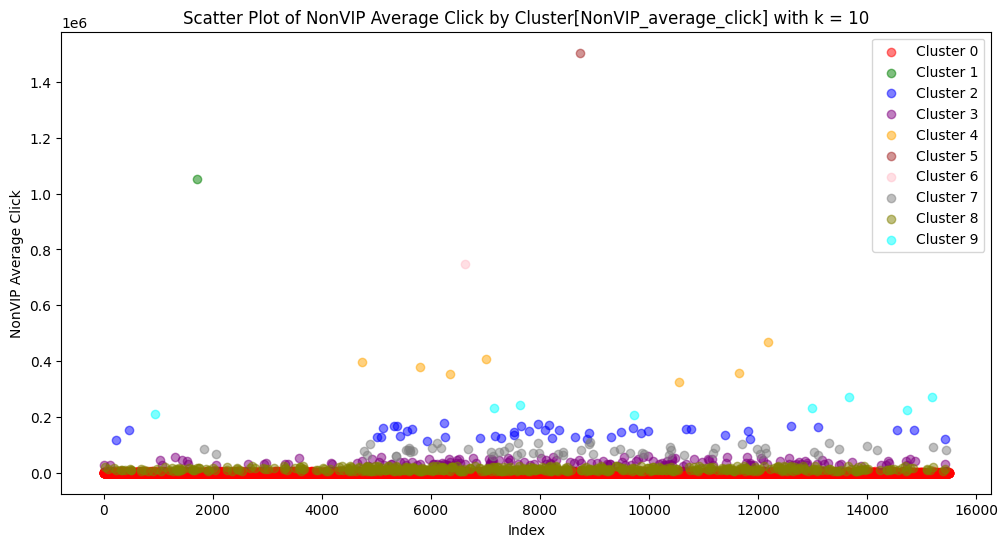

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 选择 'NonVIP_average_click' 和 'credits' 作为聚类的特征
features_for_clustering = data[['NonVIP_average_click']]

# 使用KMeans算法进行聚类，分为3类
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(features_for_clustering)

# 将聚类结果添加到数据框中
data['cluster'] = clusters

# 绘制点图，横坐标为index，纵坐标为 'NonVIP_average_click'
plt.figure(figsize=(12, 6))
for i in range(10):
    clustered_data = data[data['cluster'] == i]
    plt.scatter(clustered_data.index, clustered_data['NonVIP_average_click'], color=colors[i], alpha=0.5, label=f'Cluster {i}')
plt.title('Scatter Plot of NonVIP Average Click by Cluster[NonVIP_average_click] with k = 10')
plt.xlabel('Index')
plt.ylabel('NonVIP Average Click')
plt.legend()
plt.show()